# Task 3

# Author - Vaisshalli GopiRekha

# Handwritten Digit Recognition


##### Importing required libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')
import pickle

In [11]:
digits_train = pd.read_csv("train.csv")
digits_test = pd.read_csv("test.csv")

##### Explore dataset

In [12]:
digits_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
digits_train.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
digits_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
digits_test.tail()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
digits_train.shape

(42000, 785)

In [17]:
digits_test.shape

(28000, 784)

In [18]:
digits_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [19]:
digits_test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


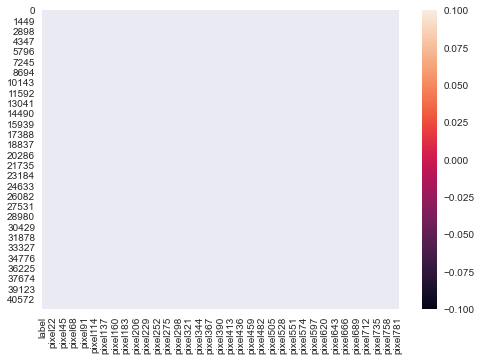

In [20]:
sns.heatmap(digits_train.isnull());
plt.show();

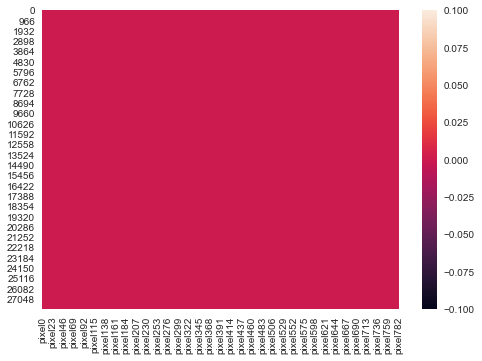

In [21]:
sns.heatmap(digits_test.isnull());
plt.show();

In [22]:
digits_train['label'].value_counts().sort_values(ascending = False)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

##### Training dataset 

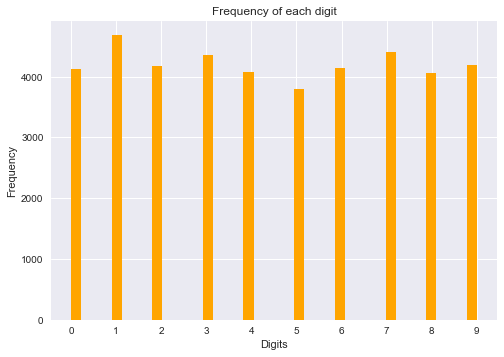

In [27]:
plt.hist(digits_train['label'], bins = 40, color = "Orange")
plt.xlabel("Digits")
plt.xticks(digits_train.label.unique())
plt.ylabel("Frequency")
plt.title("Frequency of each digit")
plt.show();

##### VIsualization of digits

In [28]:
X = digits_train.drop("label" , axis = 1)   
y = digits_train.label

In [33]:
def plot_digit(X,y,column):   
  plt.figure(figsize=(2,2))
  numpy_array = np.array(X)  
  
  plt_img = numpy_array[column].reshape(28,28)  
  plt.imshow(plt_img,cmap = "viridis" , interpolation="nearest")
  plt.axis('off')
  numpy_label = np.array(y)  
  
  plt.title(f'Label of digit => {numpy_label[column]}') 

  plt.show()

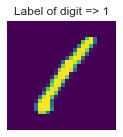

In [34]:
plot_digit(X,y,0)

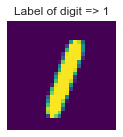

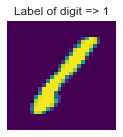

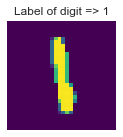

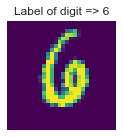

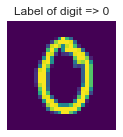

In [35]:
for i in np.random.randint(0,digits_train.shape[0],5):  
  plot_digit(X,y,i)

##### Train test split

In [36]:
X_train, X_test , y_train , y_test = train_test_split(X,y ,random_state = 42 , test_size = 0.2)

In [37]:
print(f'shape of X_train:{X_train.shape} ,shape of y_train:{y_train.shape}\nshape of X_test:{X_test.shape},shape of y_test:{y_test.shape} ')

shape of X_train:(33600, 784) ,shape of y_train:(33600,)
shape of X_test:(8400, 784),shape of y_test:(8400,) 


##### Training model

In [38]:
mnb_clf = MultinomialNB()  
rf_clf  = RandomForestClassifier()

In [39]:
def makeprediction(model1,X_train,X_test,y_train,y_test , dump = 0): #  function to make predictions
  model = model1.fit(X_train,y_train) 
  model_score = model.score(X_train,y_train)
  model_score_test = model.score(X_test , y_test)
  predictions = model.predict(X_test)
  accuracy = accuracy_score(predictions,y_test)
  print(f' model score on train set : {model_score} \n model score on test set : {model_score_test} \n Accuracy score is : {accuracy}')
  
  if dump ==1:
      file = open("model.pkl",'wb')
      pickle.dump(model,file)

In [40]:
makeprediction(mnb_clf,X_train,X_test,y_train,y_test)

 model score on train set : 0.8265476190476191 
 model score on test set : 0.8275 
 Accuracy score is : 0.8275


In [41]:
makeprediction(rf_clf,X_train,X_test,y_train,y_test)

 model score on train set : 1.0 
 model score on test set : 0.9625 
 Accuracy score is : 0.9625


In [42]:
makeprediction(rf_clf,X_train,X_test,y_train,y_test,1)

 model score on train set : 1.0 
 model score on test set : 0.963452380952381 
 Accuracy score is : 0.963452380952381


In [43]:
pickle_model = open('model.pkl','rb')
forest = pickle.load(pickle_model)

In [44]:
test_predictions = forest.predict(digits_test)

In [45]:
test_predictions

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [46]:
test_predictions.shape

(28000,)

In [50]:
def plot_test_digit(X,y,column):  #function to plot digits
  plt.figure(figsize=(2,2))
  numpy_array = np.array(X)
  
  plt_img = numpy_array[column].reshape(28,28)
  plt.imshow(plt_img,cmap = "viridis" , interpolation="nearest")
  plt.axis('off')
  numpy_label = np.array(y)
  
  plt.title(f' Predicted Label of digit =>  {numpy_label[column]}')
  

  plt.show()

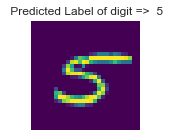

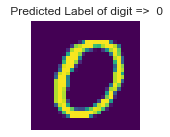

In [55]:
for i in np.random.randint(0,digits_test.shape[0],size = 2): #plotting some random digits
  plot_test_digit(digits_test,test_predictions,i)